In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [13]:
user_dt = pd.read_csv('Data/user_data.csv', sep=',', header=0)
user_dt.head()

,event_time,user_id,event,channel,user_lat,user_long,origin,ad_id,images_count,ad_impressions,ad_views,ad_messages
0,2017-05-19 10:47:22,541,view,ios,-34.600439,-58.514031,browse_search,2426321,6.0,0.0,4.0,0.0
1,2017-06-10 10:18:12,501,view,android,-34.818047,-58.356583,browse_search,2746814,5.0,152.0,85.0,1.0
2,2017-06-11 00:44:57,559,view,android,-34.688454,-58.333435,browse,1123948,4.0,899.0,22.0,1.0
3,2017-05-22 02:36:06,637,first_message,android,-34.548401,-58.485168,search,2273498,NaN,0.0,21.0,2.0
4,2017-06-08 15:45:35,509,view,android,-34.582088,-58.405041,home,2722493,3.0,1529.0,132.0,3.0


In [14]:
ads_dt = pd.read_csv('Data/ads_data.csv', sep=',', header=0)
ads_dt.head()

,ad_id,category_id,seller_id,creation_time,title,description,price,lat,long,source,enabled
0,1344,800,1157,2015-11-29 13:05:26,Blackberry curve,"Funcionando, es para personal el único problem...",300.0,NaN,NaN,android,0
1,3916,815,59,2015-12-16 09:09:25,Remera marca premium alemana,Casi nuevo y sin uso. Lo compre online y me qu...,150.0,NaN,NaN,android,1
2,11738,806,12298,2016-01-19 18:38:24,Juego de sillones estilo campo,Divino juego de sillones de diseño campo,1500.0,NaN,NaN,android,1
3,14939,815,1349,2016-01-30 23:47:30,Zapatillas,Zapatillas nro 39 dos usos,250.0,NaN,NaN,android,0
4,16820,815,16365,2016-02-05 10:22:29,Vestido de seda negro,Vestido importado de usa. Muy fino y elegante ...,500.0,NaN,NaN,android,0


In [15]:
user_ad_interests_dt = pd.read_csv('Data/user_messages.csv', sep=',', header=0)
user_ad_interests_dt.head()
# remember this is the ads a user went to (in a 7 day period) after the 30 days prior of the user_data

,user_id,category_id,ads
0,1,859,[1806476]
1,3,800,"[2131700, 2734107, 2877209, 2877209]"
2,4,815,[2883211]
3,7,815,"[2429412, 2886810, 2886804]"
4,7,362,[2909301]


In [16]:
categories = ads_dt['category_id'].unique()

## Analysing Ads with most messages ##

In [17]:
# using the ads with the most messages that are sorted and duplicates removed, find out how much of the messages
#  are represented by 20% of the population:

# remove all nan data
user_dt_messages_clean = user_dt[user_dt['ad_messages'].isnull() == False]

# merge the user data and the ad data
user_dt_msg_with_ads_data = ads_dt.merge(user_dt_messages_clean, on='ad_id')
user_dt_msg_with_ads_data_sort = user_dt_msg_with_ads_data.sort_values('ad_messages', ascending = False)
user_dt_msg_with_ads_data_sort.head()

# remove duplicates
user_dt_msg_with_ads_data_sort_no_dups = user_dt_msg_with_ads_data_sort[user_dt_msg_with_ads_data_sort.duplicated(subset='ad_id', keep='first') == False]

# clear old arrays
del user_dt_messages_clean
del user_dt_msg_with_ads_data
del user_dt_msg_with_ads_data_sort

user_dt_msg_with_ads_data_sort_no_dups.head()



,ad_id,category_id,seller_id,creation_time,title,description,price,lat,long,source,...,user_id,event,channel,user_lat,user_long,origin,images_count,ad_impressions,ad_views,ad_messages
1918128,2804693,806,434981,2017-06-07 19:54:42,planta de limon,planta de limón,149.0,NaN,NaN,apple,...,1966,view,android,-34.543266,-58.692127,browse_search,1.0,693295.0,7165.0,189.0
1337225,2814436,800,635875,2017-06-08 22:30:32,iPhone 6 en excelente estado !,iPhone 6 en excelente estado !! muy poco uso.c...,8000.0,NaN,NaN,apple,...,4171,view,android,-34.581360,-58.420368,search,6.0,205481.0,3696.0,118.0
1513127,2726025,815,490708,2017-05-28 22:41:53,Buzo abrigado abercrombie,"Muy abrigado, Azul, peludito adentro, letras p...",260.0,NaN,NaN,apple,...,5751,view,android,-34.663368,-58.508793,notification_center,2.0,79.0,730.0,99.0
417601,2347424,815,540480,2017-04-13 21:02:43,Campera cuero negra. Sin uso,NaN,500.0,NaN,NaN,android,...,10204,view,android,-34.645706,-58.570988,search,3.0,257.0,1122.0,99.0
1307236,2598159,362,335997,2017-05-14 10:47:19,Fiat 147 modelo 87,Papeles al dia,12000.0,NaN,NaN,android,...,4622,view,android,-34.726551,-58.322262,browse_search,4.0,645.0,527.0,92.0


**Now we are going to analyse if our data follows the Pareto distribution: that is if 20% of the population represents 80% of the total messages of the entire population** (OMG IT DOES FOLLOW THE PARETO DISTRIBUTION!!!!!!)

For now, we will use a small percentage of the top ads in order for out model to be small and easily maneagable

In [18]:
twenty_percent_indx = int(len(user_dt_msg_with_ads_data_sort_no_dups) * 0.2)
user_dt_ad_dt_twenty_percent = user_dt_msg_with_ads_data_sort_no_dups[0:twenty_percent_indx]
num_messages_20p = sum(user_dt_ad_dt_twenty_percent['ad_messages'].values)
num_messages_100p = sum(user_dt_msg_with_ads_data_sort_no_dups['ad_messages'].values)
print("number of messages of top 20% of ads: {}".format(num_messages_20p))
print("number of messages of top 100% of ads: {}".format(num_messages_100p))
percent_rep_20p = 100.0 * num_messages_20p / num_messages_100p
print("{}% of ad messages represented by top 20% of the ads ({} ads)".format(percent_rep_20p, twenty_percent_indx))


number of messages of top 20% of ads: 317846.0
number of messages of top 100% of ads: 381938.0
83.2192659541601% of ad messages represented by top 20% of the ads (105184 ads)


In [19]:
# calculate prioir for neuron distribution of set weights
for c in categories:
    print("prior for {} is: {}".format(c, sum(user_dt_ad_dt_twenty_percent.loc[user_dt_ad_dt_twenty_percent['category_id'] == c]['ad_messages'].values) / num_messages_20p))

prior for 800 is: 0.22111022318984666
prior for 815 is: 0.3164488462966342
prior for 806 is: 0.13659445140099294
prior for 859 is: 0.011184661754434538
prior for 811 is: 0.034677170705310116
prior for 853 is: 0.06937007229916374
prior for 881 is: 0.025798657211353927
prior for 888 is: 0.09835580752943249
prior for 887 is: 0.024480408751407914
prior for 362 is: 0.06197970086142346


## Self-Organising Map (Kohonen Map) ##
** Using a SOM to create a recommendation system. The input vector is an 1xN vector of features where each feature f_i is an ad (the # of ads used is reduced to a small percentage (approx. 20%) of the top ads). f_i is either {0, 1} where 0 means the user did not message this ad and 1 means the user did message this ad. We feed this data into the SOM which has an internal structure of MxM nodes. After the SOM has been trained, a new user's recommendations can be determined by feeding its history of messaged ads into the SOM, finding the strongest neuron and then either: selecting from the ads that other users in that neuron also chose in the post-7-day period, OR choosing ads the user might message by looking at the weights of the neuron (i.e. these weights should correspond with ads that user WOULD choose)

** DATASET: ** we now must compile the dataset which is |U|x|N| where |U| is the number of user_ids we are training on (that must have some minimum number of ads messaged in the top x% of ads - NOTE: could change to views later - NOTE2: views could be 1/10 of a message value) and |N| is the number of ads in the top x% of ads. A single user feature vector is a binary vector where each feature is 1 if the user sent a message to the ad_id associated with that feature, otherwise it is 0. 

In [21]:
# this is the data we have to use to create the feature-vector training format:
user_dt_ad_dt_twenty_percent.head()

,ad_id,category_id,seller_id,creation_time,title,description,price,lat,long,source,...,user_id,event,channel,user_lat,user_long,origin,images_count,ad_impressions,ad_views,ad_messages
1918128,2804693,806,434981,2017-06-07 19:54:42,planta de limon,planta de limón,149.0,NaN,NaN,apple,...,1966,view,android,-34.543266,-58.692127,browse_search,1.0,693295.0,7165.0,189.0
1337225,2814436,800,635875,2017-06-08 22:30:32,iPhone 6 en excelente estado !,iPhone 6 en excelente estado !! muy poco uso.c...,8000.0,NaN,NaN,apple,...,4171,view,android,-34.581360,-58.420368,search,6.0,205481.0,3696.0,118.0
1513127,2726025,815,490708,2017-05-28 22:41:53,Buzo abrigado abercrombie,"Muy abrigado, Azul, peludito adentro, letras p...",260.0,NaN,NaN,apple,...,5751,view,android,-34.663368,-58.508793,notification_center,2.0,79.0,730.0,99.0
417601,2347424,815,540480,2017-04-13 21:02:43,Campera cuero negra. Sin uso,NaN,500.0,NaN,NaN,android,...,10204,view,android,-34.645706,-58.570988,search,3.0,257.0,1122.0,99.0
1307236,2598159,362,335997,2017-05-14 10:47:19,Fiat 147 modelo 87,Papeles al dia,12000.0,NaN,NaN,android,...,4622,view,android,-34.726551,-58.322262,browse_search,4.0,645.0,527.0,92.0


In [22]:
# NOTE: the above data has removed duplicate events where ad_ids were the same. This is not good for what we want
#  because two events with the same ad_id could be from different users
top_ad_ids = user_dt_ad_dt_twenty_percent['ad_id'].values
print("top ad_ids in descending order: {}".format(top_ad_ids))
print("number of ads: {}".format(len(top_ad_ids)))

top ad_ids in descending order: [2804693 2814436 2726025 ..., 2838188  435806 2820243]
number of ads: 105184


In [23]:
# get the user_ids used for the training set:
user_ids_train = user_ad_interests_dt['user_id'].values.astype(np.uint16)
user_cats_train = user_ad_interests_dt['category_id'].values.astype(np.uint16)
user_ads_future_train = [np.fromstring(a[1:], sep=',', dtype=np.int32) for a in user_ad_interests_dt['ads'].values]
print("user ids for training: {}".format(user_ids_train))
print("user cats for training: {}".format(user_cats_train))
print("user ads future or training: {}".format(user_ads_future_train))
print("number of users: {}".format(len(user_ids_train)))

user ids for training: [    1     3     4 ..., 15056 15061 15066]
user cats for training: [859 800 815 ..., 815 806 853]
user ads future or training: [array([1806476], dtype=int32), array([2131700, 2734107, 2877209, 2877209], dtype=int32), array([2883211], dtype=int32), array([2429412, 2886810, 2886804], dtype=int32), array([2909301], dtype=int32), array([89573], dtype=int32), array([2182646], dtype=int32), array([2910937, 2836340, 2884417], dtype=int32), array([2679430, 1664304], dtype=int32), array([1864397, 2913442, 1801396], dtype=int32), array([2691952], dtype=int32), array([2726576], dtype=int32), array([2070408, 2866207, 2841786], dtype=int32), array([1954725, 2368264, 2819220, 2039982], dtype=int32), array([2882642, 2894705, 2915325, 2905871], dtype=int32), array([2916864], dtype=int32), array([2917374], dtype=int32), array([2879268, 2827203, 2887420, 2002760, 2829641, 2874015,  710159,
       2707989, 2897284, 2916683], dtype=int32), array([1429720, 2582177, 2357783, 2208312, 

In [24]:
# get the user_ids used for the test set:
user_messages_test = pd.read_csv('Data/user_messages_test.csv', sep=',', header=0)
user_ids_test = user_messages_test['user_id'].values.astype(np.uint16)
user_cats_test = user_messages_test['category_id'].values.astype(np.uint16)
print("user ids for training: {}".format(user_ids_test))
print("user cats for training: {}".format(user_cats_test))
print("number of users: {}".format(len(user_ids_test)))

user ids for training: [    2     6    14 ..., 15059 15060 15064]
user cats for training: [800 815 811 ..., 806 815 881]
number of users: 10507


In [25]:
# we now iterate through each interaction event of the users and find all the ads they have messaged or with
user_data_fm = user_dt[user_dt['event'].apply((lambda event: event == 'first_message'))]
user_data_fm_ad = user_data_fm[user_data_fm['ad_id'].apply(lambda ad_id: ad_id in top_ad_ids)]
del user_data_fm

** Compiling train data:**  pair users with the ads the have clicked

In [136]:
user_ads_messaged_train = []
df_cat_fm = pd.DataFrame.merge(user_data_fm_ad, ads_dt, on='ad_id')
counter = 0
for u in range(0, len(user_ids_train)):
    user_ads_local = df_cat_fm.loc[df_cat_fm['user_id'] == user_ids_train[u]]
    user_ads_local = user_ads_local.loc[user_ads_local['category_id'] == user_cats_train[u]]
    
    # convert all ads to indices 0...N
    ads_idexed = [np.where(top_ad_ids == a)[0][0] for a in user_ads_local['ad_id'].values]
    
    if len(ads_idexed) > 0:
        user_ads_messaged_train.append(ads_idexed)
    
    counter += 1
    if counter % 1000 == 0:
        print("parsed {} users.".format(counter))
        
print("users kept for data: {}".format(len(user_ads_messaged_train)))

parsed 1000 users.
parsed 2000 users.
parsed 3000 users.
parsed 4000 users.
parsed 5000 users.
parsed 6000 users.
parsed 7000 users.
parsed 8000 users.
parsed 9000 users.
parsed 10000 users.
users kept for data: 3944


In [137]:
print(user_ads_messaged_train[0:10])

[[166], [73754, 38257], [47040], [6654, 25795], [9339, 473], [12216, 65340, 100422, 74812, 67758, 16406, 41090, 18178, 66480, 104567, 36302, 77451, 13972, 100056, 11423, 72630, 100399], [51053, 98970, 73235], [7490], [25040], [28235, 39192]]


In [139]:
# add the category as a feature to the dataset
for u in range(0, len(user_ads_messaged_train)):
    user_ads_messaged_train[u] = np.hstack((user_ads_messaged_train[u], 
                                            int(len(top_ad_ids) + np.where(categories == user_cats_train[u])[0][0])))

In [140]:
print(user_ads_messaged_train[0:10])

[array([   166, 105187]), array([ 73754,  38257, 105184]), array([ 47040, 105185]), array([  6654,  25795, 105185]), array([  9339,    473, 105193]), array([ 12216,  65340, 100422,  74812,  67758,  16406,  41090,  18178,
        66480, 104567,  36302,  77451,  13972, 100056,  11423,  72630,
       100399, 105186]), array([ 51053,  98970,  73235, 105189]), array([  7490, 105184]), array([ 25040, 105192]), array([ 28235,  39192, 105192])]


In [141]:
# split data into training and validation
percent_train = 0.75
train_idx = int(len(user_ads_messaged_train) * percent_train)
data_train = user_ads_messaged_train[0:train_idx]
data_validation = user_ads_messaged_train[train_idx:]

In [142]:
print("size data: {}".format(len(user_ads_messaged_train)))
print("size train data: {}".format(len(data_train)))
print("size validation data: {}".format(len(data_validation)))

size data: 3944
size train data: 2958
size validation data: 986


** Compiling test data:**  pair users with the ads the have clicked

In [143]:
user_ads_messaged_test = []
counter = 0
df_cat_fm = pd.DataFrame.merge(user_data_fm_ad, ads_dt, on='ad_id')
for u in range(0, len(user_ids_test)):
    user_ads_local = df_cat_fm.loc[df_cat_fm['user_id'] == user_ids_test[u]]
    user_ads_local = user_ads_local.loc[user_ads_local['category_id'] == user_cats_test[u]]
    
     # convert all ads to indices 0...N
    ads_idexed = [np.where(top_ad_ids == a)[0][0] for a in user_ads_local['ad_id'].values]
    
    user_ads_messaged_test.append(ads_idexed)
    
    counter += 1
    if counter % 1000 == 0:
        print("parsed {} users.".format(counter))

parsed 1000 users.
parsed 2000 users.
parsed 3000 users.
parsed 4000 users.
parsed 5000 users.
parsed 6000 users.
parsed 7000 users.
parsed 8000 users.
parsed 9000 users.
parsed 10000 users.


In [144]:
print(user_ads_messaged_test[0:10])

[[], [93640, 67655, 76292, 76343, 79617, 21508, 166, 400, 406, 28951, 80946, 28067, 3431, 49124, 80900, 382, 15054, 41195, 10898, 15041, 3049, 22236, 57503, 25847, 56862, 9136, 11979, 50135], [], [55811, 55804, 15482, 51125, 8243, 491, 5416, 8250, 33075, 73862], [43054, 52512], [], [], [], [], [53474, 27234, 7968, 32659, 381, 54, 76188]]


In [145]:
# add the category as a feature to the dataset
for u in range(0, len(user_ads_messaged_test)):
    user_ads_messaged_test[u] = np.hstack((user_ads_messaged_test[u], 
                                            int(len(top_ad_ids) + np.where(categories == user_cats_test[u])[0][0])))

In [146]:
print(user_ads_messaged_test[0:10])

[array([ 105184.]), array([ 93640,  67655,  76292,  76343,  79617,  21508,    166,    400,
          406,  28951,  80946,  28067,   3431,  49124,  80900,    382,
        15054,  41195,  10898,  15041,   3049,  22236,  57503,  25847,
        56862,   9136,  11979,  50135, 105185]), array([ 105188.]), array([ 55811,  55804,  15482,  51125,   8243,    491,   5416,   8250,
        33075,  73862, 105184]), array([ 43054,  52512, 105185]), array([ 105188.]), array([ 105186.]), array([ 105184.]), array([ 105184.]), array([ 53474,  27234,   7968,  32659,    381,     54,  76188, 105191])]


In [147]:
print(user_ads_messaged_test[0:10])
print(user_ids_test[0])
print("size of test data: {}".format(len(user_ads_messaged_test)))

[array([ 105184.]), array([ 93640,  67655,  76292,  76343,  79617,  21508,    166,    400,
          406,  28951,  80946,  28067,   3431,  49124,  80900,    382,
        15054,  41195,  10898,  15041,   3049,  22236,  57503,  25847,
        56862,   9136,  11979,  50135, 105185]), array([ 105188.]), array([ 55811,  55804,  15482,  51125,   8243,    491,   5416,   8250,
        33075,  73862, 105184]), array([ 43054,  52512, 105185]), array([ 105188.]), array([ 105186.]), array([ 105184.]), array([ 105184.]), array([ 53474,  27234,   7968,  32659,    381,     54,  76188, 105191])]
2
size of test data: 10507


**Kohonen Map (SOM) class: **

In [277]:
from math import exp
from math import sqrt

# a class for kohonen map
class KohonenMap:
    
    def __init__(self, size_feature_vec, dim_neuron, feature_dataset):
        self.size_feature_vec = size_feature_vec
        self.dim_neuron = dim_neuron
        # lookup table of features. More memory-efficient than storing them all in
        #  a sparse binary array for each training input
        self.feature_dataset = feature_dataset
        # neuron weights stored in an NxW matrix
        #  where: N = num neurons, W = feature vec size
        # --> weights randomly initialised
#         self.weights = ((np.random.randn(self.dim_neuron * self.dim_neuron, self.size_feature_vec)))
        # random binary initialisation
        self.weights = ((np.random.randn(self.dim_neuron * self.dim_neuron, self.size_feature_vec) > 0.9).astype(int)).astype(float)
        print('starting weights: \n{}'.format(self.weights))
        
        # print x, y position of each neuron
#         pos = []
#         for i in range(0, self.dim_neuron * self.dim_neuron):
#             pos.append(self.get_neuron_position(i))
#         print("neuron pos: {}".format(pos))
                
        # keep track of average updates of values to see
        #  that the map is changing
        self.avg_activation_val = 0.0
        self.avg_dw_mean_update = np.zeros(self.size_feature_vec)
        self.avg_dw_max_update = np.zeros(self.size_feature_vec)
        
        self.error_over_time = []
        self.time_step = 0
        
        # assign hyperparams
        self.var_0 = float(dim_neuron) / 1.8 #a little bigger than half the diameter of the lattice
        self.learning_rate_0 = 1.0 #1.0
        self.update_hyper_params()

        
    def set_weights(self, loaded_weights):
        self.weights = loaded_weights
        print('set weights: \n{}'.format(self.weights))
    
    def set_time_step(self, time_step):
        self.time_step = time_step
        
    # given the index of a neuron, get its "position" in 2d space
    def get_neuron_position(self, neuron_idx):
        y_pos = int(float(neuron_idx) / float(self.dim_neuron))
        x_pos = neuron_idx % self.dim_neuron
        return (x_pos, y_pos)
    
    def get_neuron_index(self, x_pos, y_pos):
        return y_pos * self.dim_neuron + x_pos
    
    # return the index of the neuron with the heighest activation
    #  (i.e. weights which are closest to the weights of the input)
    def get_best_neuron(self, input_feature_vec):
        if np.shape(input_feature_vec) != (1, self.size_feature_vec):
            raise Exception("input feature vector {} is but should be {}".format(np.shape(input_feature_vec), (1, self.size_feature_vec)))
        
        diff_sqr_sum = np.sum(np.power(self.weights - input_feature_vec[0, :], 2), axis=1)
        #print("min dist: {}".format(np.min(diff_sqr_sum)))
        return np.argmin(diff_sqr_sum)
    
    def activation_metric(self, n_i, n_j):
        (x_i, y_i) = self.get_neuron_position(n_i)
        (x_j, y_j) = self.get_neuron_position(n_j)
        dist_sqr = float(pow(x_i - x_j, 2) + pow(y_i - y_j, 2))
        return min(self.var / (1.0 + dist_sqr), 1.0)
#         return exp(-dist_sqr / self.var)
        #return exp(-dist_sqr / (2.0 * self.var * self.var))
    
    def adjust_neuron_weight(self, n_best, n_update, input_feature_vec):
        if np.shape(input_feature_vec) != (1, self.size_feature_vec):
            raise Exception("input feature vector {} is but should be {}".format(np.shape(input_feature_vec), (1, self.size_feature_vec)))
        
#         act_value = self.activation_metric(n_best, n_update) 
        #d_w = self.learning_rate * act_value * \
        #    (input_feature_vec[0, :] - self.weights[n_update, :])
        
        diff = (input_feature_vec[0, :] - self.weights[n_update, :])
        d_w = self.learning_rate * (input_feature_vec[0, :] - self.weights[n_update, :])
            
#         d_w = 1.0 * (input_feature_vec[0, :] - self.weights[n_update, :])
            
        self.weights[n_update, :] += d_w
        
        # record global data
#         self.avg_activation_val += act_value
        self.avg_dw_mean_update += d_w
        
        if n_update == n_best:
            self.avg_dw_max_update = d_w
        
    def update_hyper_params(self):
        # for now, the hyper-params are linearly updated
        if self.time_step < 1000:
            self.learning_rate = max(self.learning_rate_0*(1.0 - float(self.time_step) / 1000.0), 0.1)
        else:
            self.learning_rate = max(0.01*(1.0 - float(self.time_step) / 40000.0), 0.0001)
            
#       self.var = max(self.var_0 * pow(0.99, float(time_step)), 10.0)

        self.var = max(self.var_0*(1.0 - float(self.time_step) / 1000.0), 1)
        
        #TEMP
#         self.learning_rate = 1.0
#         self.var = 1.0
        
#         print("hyperparams: lr={}, var={}".format(self.learning_rate, self.var))
        
    def data_vec_to_binary_features(self, data):
        binary_vec = np.zeros(shape=(1, self.size_feature_vec))
        binary_factor = 1.0
        # normalise
        binary_factor = float(binary_factor) / float(len(data))
#         for a in data:
        binary_vec[0, data] = binary_factor
            
        return binary_vec
    
    def train_single_input(self, input_feature_vec):
        # get the best neuron
        n_best = self.get_best_neuron(input_feature_vec)
        
        # update all neurons
#         for n in range(0, self.dim_neuron * self.dim_neuron):
#             self.adjust_neuron_weight(n_best, n, input_feature_vec)
        
        #TEST: adjust my neuron and the 8 neurons around me
        n_x, n_y = self.get_neuron_position(n_best)
#         for n in range(0, self.dim_neuron * self.dim_neuron):
        x_min = int(max(n_x - self.var, 0))
        x_max = int(min(n_x + self.var, self.dim_neuron - 1))
        y_min = int(max(n_y - self.var, 0))
        y_max = int(min(n_y + self.var, self.dim_neuron - 1))
        for x in range(x_min, x_max + 1):
            for y in range(y_min, y_max + 1):
                if pow(n_x - x, 2) + pow(n_y - y, 2) <= self.var * self.var:
                    self.adjust_neuron_weight(n_best, self.get_neuron_index(x, y), input_feature_vec)
                
#         for x in range(0, self.var):
#             for y in range(0, 3):
#                 x_pos = n_x + x - 1
#                 y_pos = n_y + y - 1
#                 if x_pos >= 0 and x_pos < self.dim_neuron and y_pos >= 0 and y_pos < self.dim_neuron:
#                     idx = self.get_neuron_index(x_pos, y_pos)
#                     self.adjust_neuron_weight(n_best, idx, input_feature_vec)
        
        # return the best neuron used, for debugging
        return n_best
        
    def train_dataset(self, data_train, data_validation):
        # check that the input data is the right dimensionality
#         if np.shape(input_data)[1] != self.size_feature_vec:
#             raise Exception("input dataset {} is not correct dimension".format(np.shape(data_train)))
        
        # reset the stored error values over time
        self.error_over_time = []
        
        num_train = len(data_train)
        print("training on {} vectors.".format(num_train))
        epochs = 8
        for e in range(0, epochs):
            print("\n\nNEW EPOCH: {}".format(e))
            # update the Kohonen Map for each training vector
            for t in range(0, num_train):
                
                self.avg_activation_val = 0.0
                self.avg_dw_mean_update = np.zeros(self.size_feature_vec)
                self.avg_dw_max_update = np.zeros(self.size_feature_vec)

                # assemble training vector
#                 train_vec = np.zeros(shape=(1, self.size_feature_vec))
#                 for a in data_train[t, :]:
#                     train_vec[np.where(a in self.feature_dataset)] = 1
                train_vec = self.data_vec_to_binary_features(data_train[t])
#                 print("data vec: {}".format(data_train[t]))
#                 print("binary vec: {}".format(train_vec))
                
        
                # get closest neuron on the lattice
                t_n_best = self.train_single_input(train_vec)
                    
                if t % 200 == 0:
                    print("time_step: {}".format(self.time_step))
                    print("\titter: {}".format(t))
                    
                    # print the global info for this timestep
                    self.avg_activation_val /= float(self.dim_neuron * self.dim_neuron)
                    self.avg_dw_mean_update /= float(self.dim_neuron * self.dim_neuron)
                    print("\tavg activation val: {}".format(self.avg_activation_val))
                    print("\tavg dw mean update: {}".format(self.avg_dw_mean_update))
                    print("\tavg dw max update: {}".format(self.avg_dw_max_update))
                    print("\tsum max update: {}".format(np.sum(abs(self.avg_dw_max_update))))
                    print("\tbest neuron used: {}".format(t_n_best))
                    
                    print("hyperparams: lr={}, var={}".format(self.learning_rate, self.var))
                    
                # print the quantization error ever 100 timesteps
                #  NOTE: this value should be decreasing
                if (t + 1) % 600 == 0:
                    avg_q_error, best_neurons = self.average_quantization_error(data_validation)
                    self.error_over_time.append(avg_q_error)
                    print("avg. quantization error at t={}: {}".format(self.time_step, avg_q_error))
                    print('best neurons: {}'.format(best_neurons))
                    
                # update the hyper params at each timestep
                self.update_hyper_params()
                    
                self.time_step += 1
                    
                            
    # average distance of all input vectors to their best neuron. A measure of how
    #  well the map has fit the data
    def average_quantization_error(self, input_data):
        # check that the input data is the right dimensionality
#         if np.shape(input_data)[1] != self.size_feature_vec:
#             raise Exception("input dataset {} is not correct dimension".format(np.shape(input_data)))
                      
        print("START: avg. quantixation error calc")
#         num_train = np.shape(input_data)[0]
        num_data = len(input_data)
        avg_q_error = 0.0
        # test on 100 random inputs
        neuron_choices = {}
        for t in range(0, num_data):
#             train_vec = np.asarray([input_data[idx, :]])
            val_vec = self.data_vec_to_binary_features(input_data[t])
            n_best = self.get_best_neuron(val_vec)
            
            if n_best in neuron_choices:
                neuron_choices[n_best] += 1
            else:
                neuron_choices[n_best] = 1
            
            dist_to_best = sum(abs(val_vec[0, :] - self.weights[n_best, :]))
            avg_q_error += dist_to_best
            
        #print('best neurons: {}'.format(neuron_choices))
                            
        return avg_q_error / float(num_data), neuron_choices
        
    

** We now train the Kohonan Map using the user data: **

In [263]:
# a list of all the features so that the training data can be dynamically created
data_features = np.hstack((top_ad_ids, categories))
print(data_features)
print("size of features: {}".format(len(data_features)))
print("size of top ads features: {}".format(len(top_ad_ids)))
print("size of category features: {}".format(len(categories)))

[2804693 2814436 2726025 ...,     888     887     362]
size of features: 105194
size of top ads features: 105184
size of category features: 10


In [264]:
# shuffle training data
np.random.shuffle(data_train)
np.random.shuffle(data_validation)
print(len(data_train))
print(len(data_validation))

2958
986


In [279]:
neuron_dim = 8
k_map = KohonenMap(len(data_features), neuron_dim, data_features)

# load the weights
load_weights = np.genfromtxt('Data/KM_weights_J30_3.csv', delimiter=",")
k_map.set_weights(load_weights)
k_map.set_time_step(15000)

print("sum of weights pre-train: {}".format(np.sum(k_map.weights, axis=1)))

# train
k_map.train_dataset(data_train, data_validation)


# print(np.shape(k_map_2.weights))
# # implement some pre-set one-hot encoding features to boost the weight training

#     # set all one-hot areas to zero first
# k_map_2.weights[:, (len(top_ad_ids) - 10):(len(top_ad_ids) - 1)] = 0

#     # now hand encoe the grouping of each neuron
# k_map_2.weights[0:3, len(top_ad_ids) - 1] = 1

# k_map_2.weights[4, len(top_ad_ids) - 7] = 1

# k_map_2.weights[5:6, len(top_ad_ids) - 6] = 1

# k_map_2.weights[7, len(top_ad_ids) - 4] = 1
# k_map_2.weights[15, len(top_ad_ids) - 4] = 1

# k_map_2.weights[8:9, len(top_ad_ids) - 3] = 1
# k_map_2.weights[16:17, len(top_ad_ids) - 3] = 1
# k_map_2.weights[24, len(top_ad_ids) - 3] = 1
# k_map_2.weights[32, len(top_ad_ids) - 3] = 1

# k_map_2.weights[10:14, len(top_ad_ids) - 10] = 1
# k_map_2.weights[18:21, len(top_ad_ids) - 10] = 1
# k_map_2.weights[25:29, len(top_ad_ids) - 10] = 1

# k_map_2.weights[22:23, len(top_ad_ids) - 5] = 1
# k_map_2.weights[30:31, len(top_ad_ids) - 5] = 1

# k_map_2.weights[33:52, len(top_ad_ids) - 9] = 1

# k_map_2.weights[53:55, len(top_ad_ids) - 8] = 1
# k_map_2.weights[58:63, len(top_ad_ids) - 8] = 1

# k_map_2.weights[56:57, len(top_ad_ids) - 2] = 1



# # train
# k_map_2.train_dataset(data_train, data_val)

# gen 1: lowest = 1.3
# gen 2: lowest = 1.15

starting weights: 
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  1.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]]
set weights: 
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
sum of weights pre-train: [ 1.          1.          1.          1.          1.          1.          1.
  0.99973911  1.          1.          1.          1.          1.          1.
  0.99988229  0.99912815  0.99989802  0.99944022  0.99874847  1.          1.
  1.          0.99902638  0.9987598   0.99882402  0.99882592  0.99769928
  0.99895092  0.99712627  1.          1.          0.99871302  0.99888821
  0.99725822  0.99863925  0.9972363   0.99756239  0.99779136  1.          1.
  0.99816692  0.99928541  0.99723009  0.99925971  0.99797787  1.          1.
  1.      

time_step: 18158
	itter: 200
	avg activation val: 0.0
	avg dw mean update: [ -2.48183835e-07  -8.91250909e-08  -6.82491394e-15 ...,   1.24767992e-05
  -2.08032029e-14  -4.53655530e-12]
	avg dw max update: [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,  -6.64230766e-04
  -1.55386305e-16  -1.07383906e-31]
	sum max update: 0.00817560777503337
	best neuron used: 56
hyperparams: lr=0.0054607499999999995, var=1
time_step: 18358
	itter: 400
	avg activation val: 0.0
	avg dw mean update: [ -2.41813904e-08  -1.06032693e-07  -2.38496475e-09 ...,  -1.26414246e-05
  -3.84590318e-06  -4.09836144e-06]
	avg dw max update: [ -9.11608379e-07  -1.40956907e-06  -1.19065665e-07 ...,  -1.24858567e-04
  -2.97331647e-06  -3.68700547e-07]
	sum max update: 0.008874647785481426
	best neuron used: 40
hyperparams: lr=0.00541075, var=1
START: avg. quantixation error calc
avg. quantization error at t=18557: 1.555516587465599
best neurons: {26: 49, 40: 68, 17: 39, 24: 96, 33: 144, 0: 54, 56: 78, 18: 77, 58:

time_step: 21716
	itter: 800
	avg activation val: 0.0
	avg dw mean update: [ -2.63632282e-07  -7.07256197e-08  -5.95500663e-08 ...,  -1.88992309e-06
  -1.44911508e-14  -2.78722693e-13]
	avg dw max update: [ -5.99541834e-06  -1.14499909e-06  -6.31269231e-16 ...,   0.00000000e+00
   0.00000000e+00  -3.69218776e-13]
	sum max update: 0.0068481275270693785
	best neuron used: 50
hyperparams: lr=0.00457125, var=1
time_step: 21916
	itter: 1000
	avg activation val: 0.0
	avg dw mean update: [ -2.49530416e-07  -1.41536855e-08  -7.80331291e-18 ...,   0.00000000e+00
   0.00000000e+00  -4.56402673e-15]
	avg dw max update: [ 0.  0.  0. ...,  0.  0.  0.]
	sum max update: 0.00608935237577434
	best neuron used: 51
hyperparams: lr=0.00452125, var=1
START: avg. quantixation error calc
avg. quantization error at t=22115: 1.5271041399363618
best neurons: {18: 49, 40: 54, 17: 64, 24: 93, 34: 62, 9: 25, 1: 54, 56: 78, 19: 77, 58: 89, 49: 70, 50: 72, 33: 56, 0: 29, 48: 28, 41: 23, 8: 33, 25: 30}
time_step: 221

time_step: 25274
	itter: 1400
	avg activation val: 0.0
	avg dw mean update: [ -1.43928239e-07  -7.72670774e-09  -2.42758379e-19 ...,  -3.52343115e-09
   0.00000000e+00  -1.41985301e-16]
	avg dw max update: [ 0.  0.  0. ...,  0.  0.  0.]
	sum max update: 0.005070165451209357
	best neuron used: 51
hyperparams: lr=0.0036817500000000006, var=1
time_step: 25474
	itter: 1600
	avg activation val: 0.0
	avg dw mean update: [ -2.24068520e-07  -4.61444429e-08  -2.05369449e-08 ...,  -1.72325667e-05
  -9.52364704e-12  -3.58376478e-11]
	avg dw max update: [ -1.89194583e-06  -1.11626996e-06  -8.21863783e-07 ...,  -1.24529299e-04
  -7.05185140e-14  -1.32827862e-12]
	sum max update: 0.006690336554737457
	best neuron used: 49
hyperparams: lr=0.0036317500000000004, var=1
START: avg. quantixation error calc
avg. quantization error at t=25673: 1.5203185859599877
best neurons: {18: 49, 40: 54, 10: 18, 25: 26, 42: 29, 24: 81, 9: 24, 1: 54, 56: 78, 19: 77, 58: 89, 49: 69, 17: 57, 50: 31, 33: 66, 51: 41, 0: 29

time_step: 28832
	itter: 2000
	avg activation val: 0.0
	avg dw mean update: [ -1.00182191e-07  -2.08353925e-08  -2.01909516e-08 ...,  -8.52461234e-06
  -2.65019497e-06  -3.11089455e-06]
	avg dw max update: [ -2.21369228e-06  -1.31641649e-07  -7.81298060e-07 ...,  -1.23256258e-04
  -1.39742826e-08  -1.73285478e-09]
	sum max update: 0.0041766691908635125
	best neuron used: 40
hyperparams: lr=0.0027922499999999996, var=1
time_step: 29032
	itter: 2200
	avg activation val: 0.0
	avg dw mean update: [ -6.95560389e-08  -3.06373045e-08  -5.29342534e-08 ...,  -3.59614812e-06
  -5.12895834e-07  -6.51763649e-07]
	avg dw max update: [ -1.25934841e-06  -4.72266003e-07  -3.11547371e-07 ...,  -7.35455978e-06
  -7.66269993e-07  -1.64889965e-06]
	sum max update: 0.0049257166861308285
	best neuron used: 41
hyperparams: lr=0.0027422500000000008, var=1
START: avg. quantixation error calc
avg. quantization error at t=29231: 1.5061440530163628
best neurons: {18: 50, 40: 54, 10: 17, 25: 29, 42: 31, 24: 68, 9:

time_step: 32390
	itter: 2600
	avg activation val: 0.0
	avg dw mean update: [ -8.07016181e-08  -1.93645407e-08  -9.73210196e-09 ...,  -9.91502354e-06
  -1.40435819e-08  -2.36694714e-08]
	avg dw max update: [ -8.16338117e-07  -4.05576746e-07  -3.95660707e-07 ...,  -6.38174625e-05
  -2.98380229e-15  -5.62025567e-14]
	sum max update: 0.003364587601907715
	best neuron used: 49
hyperparams: lr=0.0019027499999999997, var=1
time_step: 32590
	itter: 2800
	avg activation val: 0.0
	avg dw mean update: [ -3.42932389e-08  -5.27792456e-09  -1.77573876e-20 ...,   2.48730618e-05
  -2.66978909e-20  -1.17379361e-17]
	avg dw max update: [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   2.80726196e-04
  -2.98552010e-19  -2.06322436e-34]
	sum max update: 0.0024087168015502094
	best neuron used: 56
hyperparams: lr=0.0018527499999999998, var=1


NEW EPOCH: 6
time_step: 32748
	itter: 0
	avg activation val: 0.0
	avg dw mean update: [ -2.30491767e-08   0.00000000e+00   0.00000000e+00 ...,   0.00000000

time_step: 36106
	itter: 400
	avg activation val: 0.0
	avg dw mean update: [ -2.90849570e-08  -9.95272234e-09  -8.11507300e-09 ...,  -3.04680312e-06
  -9.87420420e-07  -1.04712519e-06]
	avg dw max update: [ -6.95228905e-07  -1.16965674e-08  -2.51302318e-07 ...,  -3.94670069e-05
  -1.24163698e-09  -1.53966871e-10]
	sum max update: 0.0015521214384919325
	best neuron used: 40
hyperparams: lr=0.0009737499999999999, var=1
START: avg. quantixation error calc
avg. quantization error at t=36305: 1.494153063167933
best neurons: {11: 49, 40: 54, 10: 18, 25: 30, 42: 32, 24: 68, 33: 80, 1: 54, 56: 78, 20: 77, 58: 89, 49: 52, 17: 39, 51: 31, 50: 15, 52: 41, 0: 29, 48: 22, 41: 21, 35: 27, 8: 39, 18: 21, 9: 11, 34: 9}
time_step: 36306
	itter: 600
	avg activation val: 0.0
	avg dw mean update: [ -2.67683125e-08  -9.06240117e-09  -9.96348412e-09 ...,  -2.91388918e-06
  -9.39194914e-07  -9.92179331e-07]
	avg dw max update: [ -6.51412529e-07  -1.09593984e-08  -3.15329451e-07 ...,  -3.76296002e-05
  -1.163

In [281]:
# print weights at end
print(k_map.weights)

# save the weights of the Kohonen Map
np.savetxt("Data/KM_weights_J30_4.csv", k_map.weights, delimiter=",")

[[ 0.          0.00132165  0.         ...,  0.          0.          0.        ]
 [ 0.          0.00178264  0.         ...,  0.          0.          0.        ]
 [ 0.          0.00203929  0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


In [282]:
print(np.sum(k_map.weights, axis=1))

[ 0.99947799  0.99956106  0.99929583  0.99896656  1.          1.          1.
  1.          0.99862368  0.99899618  0.99723274  0.99805261  0.99924437
  1.          1.          1.          0.99950281  0.99884593  0.99889996
  0.99889433  1.          1.          1.          1.          0.99958464
  0.99853112  0.99858141  0.9999529   1.          1.          1.          1.
  0.99822774  0.99722991  0.99771558  1.          1.          1.          1.
  1.          0.99858609  0.99708715  0.99852312  0.99831919  0.998715    1.
  1.          1.          0.99851033  0.99770356  0.99837541  0.99748478
  0.99669505  0.998715    1.          1.          0.99985822  0.99890183
  0.99998894  0.99914024  0.998715    1.          1.          1.        ]


avg error: 1.5240598450765988


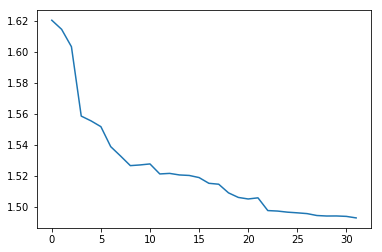

In [280]:
#### graph the quant error over time of the map
error_vals = k_map.error_over_time
print("avg error: {}".format(np.sum(error_vals) / len(error_vals)))
plt.plot(range(0, len(error_vals)), error_vals)
plt.show()

**NOTES:**: 
5 (1) epochs (5% data), 5x5 latice, 10 = v_0, 1 = lr_0, decrease mono to 1000, 0.1 = min_lr, 1.0 = min_v ===> 0.1 min. qer @ t = 6000

2 (?) epochs (5% data), 10x10 latice, 10 = v_0, 1 = lr_0, decrease mono to 1000, 0.1 = min_lr, 1.0 = min_v ===> 0.1 min. qer @ t = 6000

2 (?) epochs (20% data), 5x5 latice, 10 = v_0, 1 = lr_0, decrease mono to 1000, 0.1 = min_lr, 1.0 = min_v ===> 1.1 min. qer @ t = NO REAL IMPROVEMENT

In [285]:
# load the trained map for testing
k_map_analyse = KohonenMap(len(data_features), neuron_dim, data_features)
load_weights = np.genfromtxt('Data/KM_weights_J30_4.csv', delimiter=",")
k_map_analyse.set_weights(load_weights)

# avg_error, best_neurons = k_map_analyse.average_quantization_error(data_train)

print('avg error: {}'.format(avg_error))
print('best_neurons: {}'.format(best_neurons))
print(np.sum(k_map_analyse.weights, axis=1))

starting weights: 
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
set weights: 
[[ 0.          0.00132165  0.         ...,  0.          0.          0.        ]
 [ 0.          0.00178264  0.         ...,  0.          0.          0.        ]
 [ 0.          0.00203929  0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]
avg error: 1.4126401047894899
best_neurons: {44: 67, 7: 175, 5: 141, 16: 204, 37: 19, 12: 148, 0: 226, 20: 69, 60: 53, 28: 163, 54: 63, 63: 100, 25: 105, 19: 35, 41: 49, 13: 86, 23: 77, 50: 42, 27: 81, 56: 117, 62: 32, 18: 43, 29: 13, 10: 68, 30: 45, 48: 44, 21: 10, 38: 29, 42: 

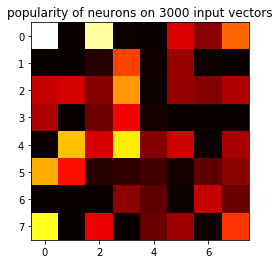

In [185]:
# create heat map of the popularity of each neuron
neuron_latice = np.zeros(shape=(neuron_dim, neuron_dim))
sum_latice = 0
for n in best_neurons:
    sum_latice += best_neurons[n]

for n in best_neurons:
    x_pos, y_pos = k_map_analyse.get_neuron_position(n)
    neuron_latice[x_pos, y_pos] = float(best_neurons[n]) / float(sum_latice)
    
plt.imshow(neuron_latice, cmap='hot', interpolation='nearest')
plt.title('popularity of neurons on 3000 input vectors')
plt.show()


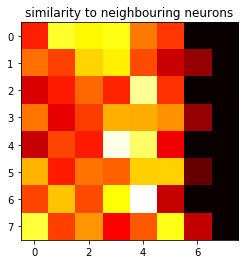

In [313]:
# distance from neighbours heatmap
neuron_lattice = np.zeros(shape=(neuron_dim, neuron_dim))
# get the sum of the absolute difference between the immediate neighbours of each neuron
for r in range(0, neuron_dim):
    for c in range(0, neuron_dim):
        # neighbours
        min_r = max(r - 1, 0)
        max_r = min(r + 1, neuron_dim - 1)
        min_c = max(c - 1, 0)
        max_c = min(c + 1, neuron_dim - 1)
        dist_n_sum = 0
        count = 0
        for n_r in range(min_r, max_r + 1):
            for n_c in range(min_c, max_c + 1):
                if n_r != r and n_c != c:
                    dist = np.linalg.norm(k_map_analyse.weights[k_map_analyse.get_neuron_index(n_c, n_r), :] - \
                            k_map_analyse.weights[k_map_analyse.get_neuron_index(c, r), :])
                    count += 1
                    dist_n_sum += dist
        neuron_lattice[r, c] = dist_n_sum / count

plt.imshow(neuron_lattice, cmap="hot", interpolation="nearest")
plt.title('similarity to neighbouring neurons')
plt.show()

**Validation Score (of how many future ads we can test in the validation sets)**

In [311]:
# the validation metric for testing is how many ads we can guess that the user would have picked.
# Because all guesses currently choose the top-10 best ads, there is no penalty for over-recommending (currently).
print("size of validation set: {}".format(len(data_validation)))
num_ads_correctly_guessed = 0
total_ads = 0
for i in range(0, 3): #len(data_validation)):
    binary_vec = k_map.data_vec_to_binary_features(data_validation[i].astype(int))
    n_best = k_map.get_best_neuron(binary_vec)
    n_best_weights = k_map.weights[n_best, :]
    
    # get the difference between the two weights:
    n_to_user_diff = n_best_weights - binary_vec
    n_to_user_diff_recommendations = (n_to_user_diff > 0.01)[0]
    
    print("diff: {}".format(np.sum(n_to_user_diff_recommendations.astype(int))))
    print("best neuron: {}".format(n_best))
    print(n_to_user_diff_recommendations)
    best_ten = top_ad_ids[n_to_user_diff_recommendations[0:len(top_ad_ids)]][0:10]
    
    # count how many are selected
    for a in best_ten:
        if a in user_ads_future_train[train_idx + i]:
            num_ads_correctly_guessed += 1
            
    total_ads += len(user_ads_future_train[train_idx + i])
    
    if i % 50 == 0:
        print("completed: {}".format(i))

size of validation set: 986
diff: 3
best neuron: 11
[False False False ..., False False False]
completed: 0
diff: 1
best neuron: 40
[False False False ...,  True False False]
diff: 1
best neuron: 10
[False False False ..., False False False]


In [304]:
print("total amount of ads val. users clicked: {}".format(total_ads))
print("number of correct recommendations: {}".format(num_ads_correctly_guessed))
accuracy = float(num_ads_correctly_guessed) / float(total_ads)
print("accuracy: {}".format(accuracy))

total amount of ads val. users clicked: 2358
number of correct recommendations: 0
accuracy: 0.0


** Recommend ads for the test users: ** we now run the user test data through the map and find the best neurons. We compare the weights of the neurons to that of the test user's weights and any vector features > 0.5 (TODO: test this threshold) we add that ad feature to the ones we would recommend for that user.

In [243]:
# user_ad_data_test
result_test = []
for i in range(0, len(user_ids_test)):
#     print("--------------------------")
#     print("user: {}".format(user_ids_test[i]))
#     print("user choices: {}".format(user_ads_messaged_test[i]))
    binary_vec = k_map.data_vec_to_binary_features(user_ads_messaged_test[i].astype(int))
    n_best = k_map.get_best_neuron(binary_vec)
    n_best_weights = k_map.weights[n_best, :]
    
    # get the difference between the two weights:
    n_to_user_diff = abs(n_best_weights - binary_vec)
    n_to_user_diff_recommendations = (n_to_user_diff > 0)[0]
    
#     print("diff: {}".format(np.sum(n_to_user_diff_recommendations)))
#     print("best neuron: {}".format(n_best))
#     print(n_to_user_diff_recommendations)
    best_ten = top_ad_ids[n_to_user_diff_recommendations[0:len(top_ad_ids)]][0:10]
    result_test.append(best_ten)
    
    if i % 1000 == 0:
        print("completed: {}".format(i))
#     print("ad recommendations: {}".format(best_ten))

completed: 0
completed: 1000
completed: 2000
completed: 3000
completed: 4000
completed: 5000
completed: 6000
completed: 7000
completed: 8000
completed: 9000
completed: 10000


In [244]:
print(result_test[0:10])

[array([2804693, 2598159, 2002760, 2732959, 2031170, 2265375, 2816336,
       2473819, 2585774, 2700285]), array([2814436, 2726025, 2598159, 2798725, 2767097, 2802621, 2812516,
       2002760, 2606594, 2727556]), array([2814436, 2598159, 2798725, 2727556, 2633788, 2342155, 2459649,
       2734125, 2700285, 2701534]), array([2804693, 2814436, 2726025, 2598159, 2798725, 2767097, 2587040,
       2812516, 2002760, 2606594]), array([2002760, 2816630, 2570736, 2473819, 2585774, 2701534, 2794582,
       2314696, 2671682, 2140749]), array([2814436, 2598159, 2798725, 2727556, 2633788, 2342155, 2459649,
       2734125, 2700285, 2701534]), array([2814436, 2798725, 2587040, 2002760, 2642613, 2570736, 2516918,
       2585774, 2700285, 2701534]), array([2804693, 2598159, 2002760, 2732959, 2031170, 2265375, 2816336,
       2473819, 2585774, 2700285]), array([2804693, 2598159, 2002760, 2732959, 2031170, 2265375, 2816336,
       2473819, 2585774, 2700285]), array([2598159, 2798725, 2587040, 2825119, 26

In [245]:
test_user_recommendations_str = []
for u in range(0, len(result_test)):
#     if len(test_user_recommendations_clean[u]) > 1:
    str_data = '[' + ', '.join(['%d' % a for a in result_test[u]]) + ']'
#     elif len(test_user_recommendations_clean[u]) == 1:
#         str_data = '[' + str(test_user_recommendations_clean[u][0]) + ']'
#     else:
#         str_data = '[]'
    test_user_recommendations_str.append(str_data)
    
    if u % 1000 == 0:
        print("completed: {}".format(u))

completed: 0
completed: 1000
completed: 2000
completed: 3000
completed: 4000
completed: 5000
completed: 6000
completed: 7000
completed: 8000
completed: 9000
completed: 10000


In [247]:
print(test_user_recommendations_str[0:10])

['[2804693, 2598159, 2002760, 2732959, 2031170, 2265375, 2816336, 2473819, 2585774, 2700285]', '[2814436, 2726025, 2598159, 2798725, 2767097, 2802621, 2812516, 2002760, 2606594, 2727556]', '[2814436, 2598159, 2798725, 2727556, 2633788, 2342155, 2459649, 2734125, 2700285, 2701534]', '[2804693, 2814436, 2726025, 2598159, 2798725, 2767097, 2587040, 2812516, 2002760, 2606594]', '[2002760, 2816630, 2570736, 2473819, 2585774, 2701534, 2794582, 2314696, 2671682, 2140749]', '[2814436, 2598159, 2798725, 2727556, 2633788, 2342155, 2459649, 2734125, 2700285, 2701534]', '[2814436, 2798725, 2587040, 2002760, 2642613, 2570736, 2516918, 2585774, 2700285, 2701534]', '[2804693, 2598159, 2002760, 2732959, 2031170, 2265375, 2816336, 2473819, 2585774, 2700285]', '[2804693, 2598159, 2002760, 2732959, 2031170, 2265375, 2816336, 2473819, 2585774, 2700285]', '[2598159, 2798725, 2587040, 2825119, 2633788, 2794985, 2342155, 2516918, 2246912, 2734125]']


In [248]:
print("{}".format(np.shape(result_test)))
test_user_df = pd.DataFrame(data=test_user_recommendations_str, columns=["ads"])

final_test_results = pd.concat([user_messages_test, test_user_df], axis=1)
final_test_results.to_csv('Data/test_results_kmap_30_7_17.csv', sep=',')

(10507, 10)
